# Facial Keypoints Detection
- Given dataset contains x, y coordinates of 15 facial keypoints and grayscale face image.
- Dataset contains columns as separate x coordinates and separate y coordinates of 15 keypoints => 30 columns
- Last column is 96x96 grayscale intensities of images in flatened manner.

### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Extract Dataset Zip Files

In [2]:
import zipfile
with zipfile.ZipFile('/kaggle/input/facial-keypoints-detection/training.zip', 'r') as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile('/kaggle/input/facial-keypoints-detection/test.zip', 'r') as zip_ref:
    zip_ref.extractall()

### Dataset Analysis

In [14]:
train_data_df = pd.read_csv('training.csv')
test_data_df = pd.read_csv('test.csv')
lookid_data_df = pd.read_csv('/kaggle/input/facial-keypoints-detection/IdLookupTable.csv')   

In [15]:
train_data_df.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


In [16]:
test_data_df.head().T

,0,1,2,3,4
ImageId,1,2,3,4,5
Image,182 183 182 182 180 180 176 169 156 137 124 10...,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,177 176 174 170 169 169 168 166 166 166 161 14...,176 174 174 175 174 174 176 176 175 171 165 15...,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


#### Handling Missing Values

In [17]:
train_data_df.isnull().any().value_counts()

True     28
False     3
Name: count, dtype: int64

##### Replace them with previous valid data in column or drop the whole sample

In [18]:
train_data_df.fillna(method = 'ffill',inplace = True)

/tmp/ipykernel_33/3834047745.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data_df.fillna(method = 'ffill',inplace = True)


In [19]:
train_data_df.isnull().any().value_counts()

False    31
Name: count, dtype: int64

### Split Preparation

In [20]:
# Create a list of images and convert them in array of images
imgs_list = []
for i in range(0,7049):
    img = train_data_df['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imgs_list.append(img)
    
images_array = np.array(imgs_list, dtype = 'float')
X_train = images_array.reshape(-1, 1, 96, 96)       # model expects in (channel, width, height)

In [ ]:
# training = train_data_df.drop('Image',axis = 1)

# y_train = []
# for i in range(0,7049):
#     y = training.iloc[i,:]
#     y_train.append(y)
    
# y_train = np.array(y_train,dtype = 'float')

In [21]:
train_data_df.drop('Image', axis=1, inplace=True)
y_train = train_data_df.values.astype('float')

train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [22]:
train_x.shape

(5639, 1, 96, 96)

In [23]:
val_x.shape

(1410, 1, 96, 96)

#### Data visualisation

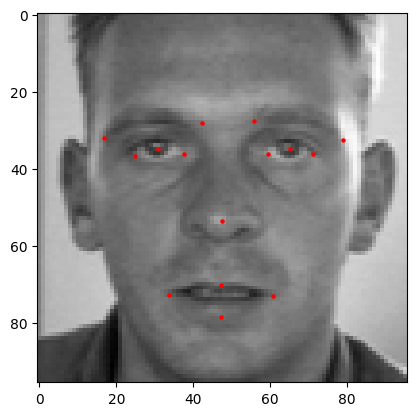

In [27]:
idx = 2
plt.imshow(X_train[idx].reshape(96,96),cmap='gray')
plt.scatter(y_train[idx][0::2], y_train[idx][1::2], marker='.', s=20, c='red')
plt.show()

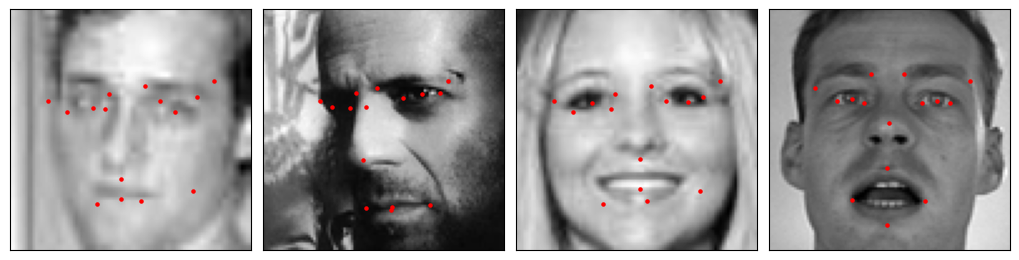

In [26]:
# def plot_sample_list(x, y, axis, idx):
#     img = x[idx].reshape(96, 96)
#     axis.imshow(img, cmap='gray')
#     axis.scatter(y[idx][0::2], y[idx][1::2], marker='.', s=20, c='red')

# def show_images_more(num, idx):
#     fig = plt.figure(figsize=(10, 10))
#     fig.subplots_adjust(
#     left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) #
#     for i in range(num):
#         axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
#         plot_sample_list(train_x, train_y, axis, i+idx) #
#     plt.show()

# show_images_more(4, 25) 

In [28]:
# for printing model layers and parameters
!pip install -q torchsummary

### Import Libraries for DL

In [29]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
from tqdm import tqdm
from torchvision.io import read_image
from PIL import Image
from sklearn.model_selection import train_test_split
from torchsummary import summary

### Create Dataset and Dataloaders

In [30]:
#converting to tensors
train_x_tensor = torch.tensor(train_x, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32)
val_x_tensor = torch.tensor(val_x, dtype=torch.float32)
val_y_tensor = torch.tensor(val_y, dtype=torch.float32)

ds_train = torch.utils.data.TensorDataset(train_x_tensor[:], train_y_tensor[:])
ds_val = torch.utils.data.TensorDataset(val_x_tensor[:], val_y_tensor[:])

train_dl = torch.utils.data.DataLoader(ds_train, batch_size=32, drop_last=True)
valid_dl = torch.utils.data.DataLoader(ds_val, batch_size=32, drop_last=True)

In [31]:
for i, sample in enumerate(train_dl):
    if i < 1:  # print first 1 samples
        print(f"Sample {i+1}: {len(sample)}")
        print(sample[0].shape, sample[1].shape)
        print(sample[0].dtype, sample[1].dtype)

Sample 1: 2
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.float32 torch.float32


In [32]:
for i, sample in enumerate(valid_dl):
    if i < 1:  # Print only the first 3 samples
        print(f"Sample {i+1}: {len(sample)}")
        print(sample[0].shape, sample[1].shape)
        print(sample[0].dtype, sample[1].dtype)

Sample 1: 2
torch.Size([32, 1, 96, 96]) torch.Size([32, 30])
torch.float32 torch.float32


## Model Architecture

In [33]:
# model architecture
class KPNet(nn.Module):
    def __init__(self):
        super(KPNet, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(32),
            nn.LeakyReLU()
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(32),
            nn.LeakyReLU()
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.LeakyReLU()
        )
        
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.LeakyReLU()
        )
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.LeakyReLU()
        )
        
        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(128),
            nn.LeakyReLU()
        )
        
        self.conv7 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(128),
            nn.LeakyReLU()
        )
        
        self.conv8 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(256),
            nn.LeakyReLU()
        )
        
        self.conv9 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(256),
            nn.LeakyReLU()
        )
        
        self.conv10 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(256),
            nn.LeakyReLU()
        )
        
        self.conv11 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.LeakyReLU()
        )
        
        self.fc1 = nn.Linear(256 * 4 * 4, 1024)
        self.dropout1 = nn.Dropout(0.2)
        self.lrelu = nn.LeakyReLU(negative_slope=0.01)
        self.fc2 = nn.Linear(1024, 256)
        self.dropout2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(256, 30)
        
    def forward(self, x):
#         print(x.dtype)
#         print(x.shape)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = self.conv7(x)
        x = self.conv8(x)
        x = self.conv9(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = self.conv10(x)
        
#         print(x.shape)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.lrelu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.lrelu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        
        return x


In [34]:
# define the model
model = KPNet()

# move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

# model summary
summary(model, (1, 96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 94, 94]             320
       BatchNorm2d-2           [-1, 32, 94, 94]              64
         LeakyReLU-3           [-1, 32, 94, 94]               0
            Conv2d-4           [-1, 32, 92, 92]           9,248
       BatchNorm2d-5           [-1, 32, 92, 92]              64
         LeakyReLU-6           [-1, 32, 92, 92]               0
            Conv2d-7           [-1, 64, 90, 90]          18,496
       BatchNorm2d-8           [-1, 64, 90, 90]             128
         LeakyReLU-9           [-1, 64, 90, 90]               0
           Conv2d-10           [-1, 64, 43, 43]          36,928
      BatchNorm2d-11           [-1, 64, 43, 43]             128
        LeakyReLU-12           [-1, 64, 43, 43]               0
           Conv2d-13           [-1, 64, 41, 41]          36,928
      BatchNorm2d-14           [-1, 64,

### Model Training

In [36]:
from statistics import mean
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# define the training loop
num_epochs = 10

train_loss = []
valid_loss = []

for epoch in range(num_epochs):
    
    print(f"Epoch {epoch+1}/{num_epochs}")
    running_train_loss = []
    running_valid_loss = []
    i=0
    
    for inputs, kpts in tqdm(train_dl):
        i += 1
#         print(inputs.shape)
#         print(kpts.dtype)
        
        inputs = inputs.to(device)
        kpts = kpts.to(device)
        
        model.train()  #================train==============
        
        # Forward pass
        pred_kpts= model(inputs)
        
        # Calculate the loss
        loss = loss_fn(pred_kpts, kpts)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Append the running loss
        running_train_loss.append(loss.item())
        
        if i%16 == 0:
            print(f"{'Training ':<{12}}: Loss in batch {i} = {running_train_loss[-1]:.3f}")
        
    # mean epoch training loss
    train_loss.append(mean(running_train_loss))
    
    print(f"{'Training':<{12}}: Mean Loss = {mean(running_train_loss):.3f}")
    
    i = 0
    for inputs, kpts in tqdm(valid_dl):
        i += 1
        inputs = inputs.to(device)
        kpts = kpts.to(device)
        
        model.eval() #================== valid
        # Calculate the validation loss
        with torch.no_grad():
            pred_kpts= model(inputs)
            loss = loss_fn(pred_kpts, kpts)
        
        # Append the validation loss
        running_valid_loss.append(loss.item())
        
        if i%16 == 0:
            print(f"{'Validation ':<{12}}: Loss in batch {i} = {running_valid_loss[-1]:.3f}")
    
    # mean epoch validation loss 
    valid_loss.append(mean(running_valid_loss))
    
    print(f"{'Validation':<{12}}: Mean Loss = {mean(running_valid_loss):.3f}")
    print()

Epoch 1/10


 11%|█         | 19/176 [00:00<00:05, 31.10it/s]

Training    : Loss in batch 16 = 31.889


 20%|█▉        | 35/176 [00:01<00:04, 31.25it/s]

Training    : Loss in batch 32 = 22.665


 29%|██▉       | 51/176 [00:01<00:03, 31.34it/s]

Training    : Loss in batch 48 = 21.058


 38%|███▊      | 67/176 [00:02<00:03, 31.40it/s]

Training    : Loss in batch 64 = 16.003


 47%|████▋     | 83/176 [00:02<00:02, 31.34it/s]

Training    : Loss in batch 80 = 19.080


 56%|█████▋    | 99/176 [00:03<00:02, 31.33it/s]

Training    : Loss in batch 96 = 19.729


 65%|██████▌   | 115/176 [00:03<00:01, 31.33it/s]

Training    : Loss in batch 112 = 19.564


 74%|███████▍  | 131/176 [00:04<00:01, 31.35it/s]

Training    : Loss in batch 128 = 14.297


 84%|████████▎ | 147/176 [00:04<00:00, 31.25it/s]

Training    : Loss in batch 144 = 16.222


 93%|█████████▎| 163/176 [00:05<00:00, 31.21it/s]

Training    : Loss in batch 160 = 13.152


100%|██████████| 176/176 [00:05<00:00, 31.26it/s]


Training    : Loss in batch 176 = 13.753
Training    : Mean Loss = 24.468


 25%|██▌       | 11/44 [00:00<00:00, 109.69it/s]

Validation  : Loss in batch 16 = 10.891


 80%|███████▉  | 35/44 [00:00<00:00, 110.07it/s]

Validation  : Loss in batch 32 = 16.348


100%|██████████| 44/44 [00:00<00:00, 109.82it/s]


Validation  : Mean Loss = 13.183

Epoch 2/10


 11%|█▏        | 20/176 [00:00<00:04, 31.43it/s]

Training    : Loss in batch 16 = 15.112


 20%|██        | 36/176 [00:01<00:04, 31.40it/s]

Training    : Loss in batch 32 = 19.138


 30%|██▉       | 52/176 [00:01<00:03, 31.39it/s]

Training    : Loss in batch 48 = 21.430


 39%|███▊      | 68/176 [00:02<00:03, 31.31it/s]

Training    : Loss in batch 64 = 17.957


 48%|████▊     | 84/176 [00:02<00:02, 31.35it/s]

Training    : Loss in batch 80 = 17.057


 57%|█████▋    | 100/176 [00:03<00:02, 31.38it/s]

Training    : Loss in batch 96 = 18.916


 66%|██████▌   | 116/176 [00:03<00:01, 31.40it/s]

Training    : Loss in batch 112 = 14.393


 75%|███████▌  | 132/176 [00:04<00:01, 31.39it/s]

Training    : Loss in batch 128 = 13.205


 84%|████████▍ | 148/176 [00:04<00:00, 31.41it/s]

Training    : Loss in batch 144 = 12.838


 93%|█████████▎| 164/176 [00:05<00:00, 31.29it/s]

Training    : Loss in batch 160 = 12.127


100%|██████████| 176/176 [00:05<00:00, 31.34it/s]


Training    : Loss in batch 176 = 12.800
Training    : Mean Loss = 16.640


 27%|██▋       | 12/44 [00:00<00:00, 110.46it/s]

Validation  : Loss in batch 16 = 10.894


 80%|███████▉  | 35/44 [00:00<00:00, 109.75it/s]

Validation  : Loss in batch 32 = 17.229


100%|██████████| 44/44 [00:00<00:00, 109.59it/s]


Validation  : Mean Loss = 13.485

Epoch 3/10


 11%|█▏        | 20/176 [00:00<00:04, 31.34it/s]

Training    : Loss in batch 16 = 17.474


 20%|██        | 36/176 [00:01<00:04, 31.33it/s]

Training    : Loss in batch 32 = 15.934


 30%|██▉       | 52/176 [00:01<00:03, 31.32it/s]

Training    : Loss in batch 48 = 23.648


 39%|███▊      | 68/176 [00:02<00:03, 31.30it/s]

Training    : Loss in batch 64 = 16.036


 48%|████▊     | 84/176 [00:02<00:02, 31.35it/s]

Training    : Loss in batch 80 = 12.390


 57%|█████▋    | 100/176 [00:03<00:02, 31.38it/s]

Training    : Loss in batch 96 = 19.745


 66%|██████▌   | 116/176 [00:03<00:01, 31.35it/s]

Training    : Loss in batch 112 = 16.069


 75%|███████▌  | 132/176 [00:04<00:01, 31.33it/s]

Training    : Loss in batch 128 = 12.964


 84%|████████▍ | 148/176 [00:04<00:00, 31.37it/s]

Training    : Loss in batch 144 = 9.292


 93%|█████████▎| 164/176 [00:05<00:00, 31.38it/s]

Training    : Loss in batch 160 = 13.165


100%|██████████| 176/176 [00:05<00:00, 31.35it/s]


Training    : Loss in batch 176 = 10.124
Training    : Mean Loss = 15.891


 27%|██▋       | 12/44 [00:00<00:00, 110.85it/s]

Validation  : Loss in batch 16 = 14.771


 82%|████████▏ | 36/44 [00:00<00:00, 110.07it/s]

Validation  : Loss in batch 32 = 27.049


100%|██████████| 44/44 [00:00<00:00, 109.99it/s]


Validation  : Mean Loss = 19.211

Epoch 4/10


 11%|█▏        | 20/176 [00:00<00:04, 31.38it/s]

Training    : Loss in batch 16 = 13.711


 20%|██        | 36/176 [00:01<00:04, 31.36it/s]

Training    : Loss in batch 32 = 11.941


 30%|██▉       | 52/176 [00:01<00:03, 31.39it/s]

Training    : Loss in batch 48 = 14.293


 39%|███▊      | 68/176 [00:02<00:03, 31.37it/s]

Training    : Loss in batch 64 = 8.900


 48%|████▊     | 84/176 [00:02<00:02, 31.33it/s]

Training    : Loss in batch 80 = 14.494


 57%|█████▋    | 100/176 [00:03<00:02, 31.29it/s]

Training    : Loss in batch 96 = 15.582


 66%|██████▌   | 116/176 [00:03<00:01, 31.33it/s]

Training    : Loss in batch 112 = 17.237


 75%|███████▌  | 132/176 [00:04<00:01, 31.34it/s]

Training    : Loss in batch 128 = 6.766


 84%|████████▍ | 148/176 [00:04<00:00, 31.34it/s]

Training    : Loss in batch 144 = 8.849


 93%|█████████▎| 164/176 [00:05<00:00, 31.35it/s]

Training    : Loss in batch 160 = 13.635


100%|██████████| 176/176 [00:05<00:00, 31.34it/s]


Training    : Loss in batch 176 = 7.471
Training    : Mean Loss = 13.429


 25%|██▌       | 11/44 [00:00<00:00, 109.58it/s]

Validation  : Loss in batch 16 = 6.417


 75%|███████▌  | 33/44 [00:00<00:00, 109.78it/s]

Validation  : Loss in batch 32 = 11.280


100%|██████████| 44/44 [00:00<00:00, 109.41it/s]


Validation  : Mean Loss = 8.824

Epoch 5/10


 11%|█▏        | 20/176 [00:00<00:04, 31.43it/s]

Training    : Loss in batch 16 = 11.300


 20%|██        | 36/176 [00:01<00:04, 31.41it/s]

Training    : Loss in batch 32 = 9.502


 30%|██▉       | 52/176 [00:01<00:03, 31.39it/s]

Training    : Loss in batch 48 = 12.820


 39%|███▊      | 68/176 [00:02<00:03, 31.40it/s]

Training    : Loss in batch 64 = 12.706


 48%|████▊     | 84/176 [00:02<00:02, 31.33it/s]

Training    : Loss in batch 80 = 11.017


 57%|█████▋    | 100/176 [00:03<00:02, 31.35it/s]

Training    : Loss in batch 96 = 25.042


 66%|██████▌   | 116/176 [00:03<00:01, 31.38it/s]

Training    : Loss in batch 112 = 14.270


 75%|███████▌  | 132/176 [00:04<00:01, 31.34it/s]

Training    : Loss in batch 128 = 11.201


 84%|████████▍ | 148/176 [00:04<00:00, 31.40it/s]

Training    : Loss in batch 144 = 11.010


 93%|█████████▎| 164/176 [00:05<00:00, 31.37it/s]

Training    : Loss in batch 160 = 7.651


100%|██████████| 176/176 [00:05<00:00, 31.38it/s]


Training    : Loss in batch 176 = 8.086
Training    : Mean Loss = 12.410


 25%|██▌       | 11/44 [00:00<00:00, 109.94it/s]

Validation  : Loss in batch 16 = 11.010


 77%|███████▋  | 34/44 [00:00<00:00, 110.15it/s]

Validation  : Loss in batch 32 = 20.548


100%|██████████| 44/44 [00:00<00:00, 110.00it/s]


Validation  : Mean Loss = 14.139

Epoch 6/10


 11%|█▏        | 20/176 [00:00<00:04, 31.42it/s]

Training    : Loss in batch 16 = 17.138


 20%|██        | 36/176 [00:01<00:04, 31.37it/s]

Training    : Loss in batch 32 = 10.885


 30%|██▉       | 52/176 [00:01<00:03, 31.42it/s]

Training    : Loss in batch 48 = 13.736


 39%|███▊      | 68/176 [00:02<00:03, 31.42it/s]

Training    : Loss in batch 64 = 11.289


 48%|████▊     | 84/176 [00:02<00:02, 31.40it/s]

Training    : Loss in batch 80 = 11.526


 57%|█████▋    | 100/176 [00:03<00:02, 31.36it/s]

Training    : Loss in batch 96 = 12.478


 66%|██████▌   | 116/176 [00:03<00:01, 31.39it/s]

Training    : Loss in batch 112 = 10.818


 75%|███████▌  | 132/176 [00:04<00:01, 31.38it/s]

Training    : Loss in batch 128 = 7.583


 84%|████████▍ | 148/176 [00:04<00:00, 31.38it/s]

Training    : Loss in batch 144 = 15.859


 93%|█████████▎| 164/176 [00:05<00:00, 31.32it/s]

Training    : Loss in batch 160 = 7.812


100%|██████████| 176/176 [00:05<00:00, 31.38it/s]


Training    : Loss in batch 176 = 7.816
Training    : Mean Loss = 11.804


 25%|██▌       | 11/44 [00:00<00:00, 108.00it/s]

Validation  : Loss in batch 16 = 7.223


 75%|███████▌  | 33/44 [00:00<00:00, 108.17it/s]

Validation  : Loss in batch 32 = 13.083


100%|██████████| 44/44 [00:00<00:00, 107.88it/s]


Validation  : Mean Loss = 9.132

Epoch 7/10


 11%|█▏        | 20/176 [00:00<00:04, 31.34it/s]

Training    : Loss in batch 16 = 9.483


 20%|██        | 36/176 [00:01<00:04, 31.34it/s]

Training    : Loss in batch 32 = 16.729


 30%|██▉       | 52/176 [00:01<00:03, 31.39it/s]

Training    : Loss in batch 48 = 12.879


 39%|███▊      | 68/176 [00:02<00:03, 31.27it/s]

Training    : Loss in batch 64 = 7.968


 48%|████▊     | 84/176 [00:02<00:02, 31.34it/s]

Training    : Loss in batch 80 = 16.671


 57%|█████▋    | 100/176 [00:03<00:02, 31.39it/s]

Training    : Loss in batch 96 = 15.333


 66%|██████▌   | 116/176 [00:03<00:01, 31.38it/s]

Training    : Loss in batch 112 = 11.026


 75%|███████▌  | 132/176 [00:04<00:01, 31.14it/s]

Training    : Loss in batch 128 = 6.860


 84%|████████▍ | 148/176 [00:04<00:00, 31.33it/s]

Training    : Loss in batch 144 = 8.655


 93%|█████████▎| 164/176 [00:05<00:00, 31.28it/s]

Training    : Loss in batch 160 = 8.957


100%|██████████| 176/176 [00:05<00:00, 31.33it/s]


Training    : Loss in batch 176 = 6.451
Training    : Mean Loss = 11.061


 27%|██▋       | 12/44 [00:00<00:00, 110.32it/s]

Validation  : Loss in batch 16 = 4.446


 80%|███████▉  | 35/44 [00:00<00:00, 109.87it/s]

Validation  : Loss in batch 32 = 10.072


100%|██████████| 44/44 [00:00<00:00, 109.68it/s]


Validation  : Mean Loss = 6.599

Epoch 8/10


 11%|█▏        | 20/176 [00:00<00:04, 31.24it/s]

Training    : Loss in batch 16 = 9.501


 20%|██        | 36/176 [00:01<00:04, 31.12it/s]

Training    : Loss in batch 32 = 7.899


 30%|██▉       | 52/176 [00:01<00:03, 31.27it/s]

Training    : Loss in batch 48 = 10.084


 39%|███▊      | 68/176 [00:02<00:03, 31.33it/s]

Training    : Loss in batch 64 = 7.507


 48%|████▊     | 84/176 [00:02<00:02, 31.39it/s]

Training    : Loss in batch 80 = 15.497


 57%|█████▋    | 100/176 [00:03<00:02, 31.33it/s]

Training    : Loss in batch 96 = 15.159


 66%|██████▌   | 116/176 [00:03<00:01, 31.37it/s]

Training    : Loss in batch 112 = 9.795


 75%|███████▌  | 132/176 [00:04<00:01, 31.22it/s]

Training    : Loss in batch 128 = 6.871


 84%|████████▍ | 148/176 [00:04<00:00, 31.24it/s]

Training    : Loss in batch 144 = 7.471


 93%|█████████▎| 164/176 [00:05<00:00, 31.21it/s]

Training    : Loss in batch 160 = 7.386


100%|██████████| 176/176 [00:05<00:00, 31.26it/s]


Training    : Loss in batch 176 = 9.973
Training    : Mean Loss = 10.384


 25%|██▌       | 11/44 [00:00<00:00, 109.55it/s]

Validation  : Loss in batch 16 = 4.355


 75%|███████▌  | 33/44 [00:00<00:00, 109.04it/s]

Validation  : Loss in batch 32 = 9.213


100%|██████████| 44/44 [00:00<00:00, 108.49it/s]


Validation  : Mean Loss = 6.220

Epoch 9/10


 11%|█▏        | 20/176 [00:00<00:04, 31.43it/s]

Training    : Loss in batch 16 = 9.119


 20%|██        | 36/176 [00:01<00:04, 31.41it/s]

Training    : Loss in batch 32 = 9.014


 30%|██▉       | 52/176 [00:01<00:03, 31.41it/s]

Training    : Loss in batch 48 = 16.650


 39%|███▊      | 68/176 [00:02<00:03, 31.39it/s]

Training    : Loss in batch 64 = 7.016


 48%|████▊     | 84/176 [00:02<00:02, 31.41it/s]

Training    : Loss in batch 80 = 14.522


 57%|█████▋    | 100/176 [00:03<00:02, 31.35it/s]

Training    : Loss in batch 96 = 12.901


 66%|██████▌   | 116/176 [00:03<00:01, 31.39it/s]

Training    : Loss in batch 112 = 10.646


 75%|███████▌  | 132/176 [00:04<00:01, 31.40it/s]

Training    : Loss in batch 128 = 5.239


 84%|████████▍ | 148/176 [00:04<00:00, 31.41it/s]

Training    : Loss in batch 144 = 9.185


 93%|█████████▎| 164/176 [00:05<00:00, 31.34it/s]

Training    : Loss in batch 160 = 7.953


100%|██████████| 176/176 [00:05<00:00, 31.39it/s]


Training    : Loss in batch 176 = 7.256
Training    : Mean Loss = 9.815


 25%|██▌       | 11/44 [00:00<00:00, 109.87it/s]

Validation  : Loss in batch 16 = 3.951


 77%|███████▋  | 34/44 [00:00<00:00, 109.99it/s]

Validation  : Loss in batch 32 = 7.992


100%|██████████| 44/44 [00:00<00:00, 109.83it/s]


Validation  : Mean Loss = 6.162

Epoch 10/10


 11%|█▏        | 20/176 [00:00<00:04, 31.38it/s]

Training    : Loss in batch 16 = 7.966


 20%|██        | 36/176 [00:01<00:04, 31.34it/s]

Training    : Loss in batch 32 = 9.261


 30%|██▉       | 52/176 [00:01<00:03, 31.25it/s]

Training    : Loss in batch 48 = 10.843


 39%|███▊      | 68/176 [00:02<00:03, 31.32it/s]

Training    : Loss in batch 64 = 7.777


 48%|████▊     | 84/176 [00:02<00:02, 31.32it/s]

Training    : Loss in batch 80 = 7.202


 57%|█████▋    | 100/176 [00:03<00:02, 31.35it/s]

Training    : Loss in batch 96 = 15.677


 66%|██████▌   | 116/176 [00:03<00:01, 31.37it/s]

Training    : Loss in batch 112 = 11.849


 75%|███████▌  | 132/176 [00:04<00:01, 31.21it/s]

Training    : Loss in batch 128 = 5.824


 84%|████████▍ | 148/176 [00:04<00:00, 31.34it/s]

Training    : Loss in batch 144 = 6.152


 93%|█████████▎| 164/176 [00:05<00:00, 31.38it/s]

Training    : Loss in batch 160 = 7.299


100%|██████████| 176/176 [00:05<00:00, 31.33it/s]


Training    : Loss in batch 176 = 5.814
Training    : Mean Loss = 9.024


 25%|██▌       | 11/44 [00:00<00:00, 109.28it/s]

Validation  : Loss in batch 16 = 5.798


 75%|███████▌  | 33/44 [00:00<00:00, 109.80it/s]

Validation  : Loss in batch 32 = 11.559


100%|██████████| 44/44 [00:00<00:00, 109.30it/s]

Validation  : Mean Loss = 8.034



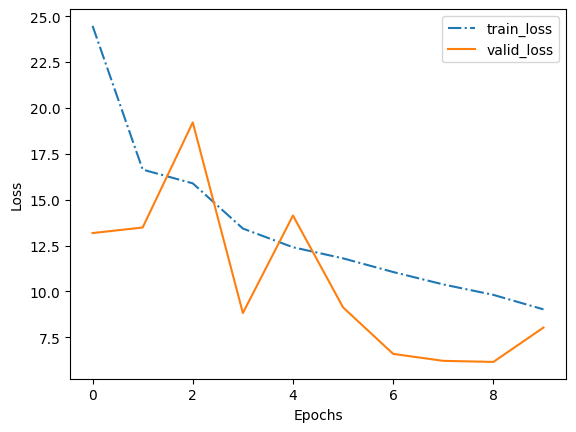

In [37]:
epoch_list = [i for i in range(num_epochs)]
plt.plot(epoch_list,train_loss, linestyle="-.", label="train_loss")
plt.plot(epoch_list,valid_loss, label="valid_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing

In [38]:
#preparing test data
timag = []
for i in range(0,1783):
    timg = test_data_df['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [39]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 

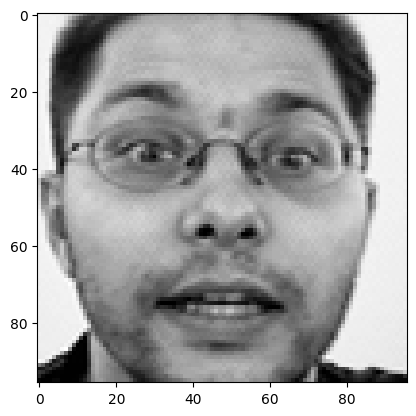

In [40]:
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show()

In [43]:
test_x_tensor = torch.tensor(X_test, dtype=torch.float32)
test_x_tensor.shape

torch.Size([1783, 96, 96, 1])

In [44]:
test_sample = test_x_tensor[:5].view(5, 1, 96, 96)
test_sample.shape

torch.Size([5, 1, 96, 96])

In [45]:
test_sample = test_sample.to(device)
pred = model(test_sample)

In [46]:
test_sample = test_sample.cpu()
pred = pred.detach().cpu().numpy()

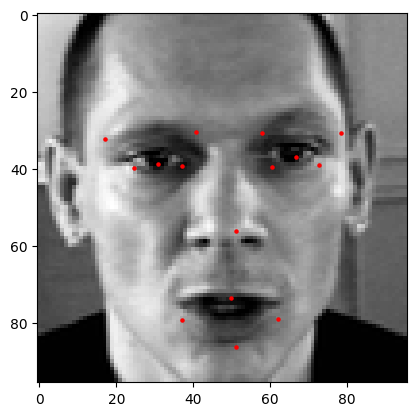

In [98]:
idx = 2
plt.imshow(test_sample[idx].reshape(96,96),cmap='gray')
plt.scatter(pred[idx][0::2], pred[idx][1::2], marker='.', s=20,c='red')
plt.show()